In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Retail_footfall_data.csv")

In [3]:
dataset.head()

,Date,Shift,Footfall,Required_Staff,Available_Employees,Wage_per_Hour_Rs,Shift_Duration_Hours,Max_Hours_Per_Week_Per_Employee,Assigned_Staff
0,01/11/25,6:00,390,7,9,198,6,48,7
1,01/11/25,18:00,628,11,12,221,6,48,11
2,01/11/25,12:00,257,5,8,215,6,48,5
3,02/11/25,6:00,276,5,8,202,6,48,5
4,02/11/25,18:00,477,8,11,208,6,48,8


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             180 non-null    object
 1   Shift                            180 non-null    object
 2   Footfall                         180 non-null    int64 
 3   Required_Staff                   180 non-null    int64 
 4   Available_Employees              180 non-null    int64 
 5   Wage_per_Hour_Rs                 180 non-null    int64 
 6   Shift_Duration_Hours             180 non-null    int64 
 7   Max_Hours_Per_Week_Per_Employee  180 non-null    int64 
 8   Assigned_Staff                   180 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 12.8+ KB


In [5]:
dataset.isnull().sum()

,0
Date,0
Shift,0
Footfall,0
Required_Staff,0
Available_Employees,0
Wage_per_Hour_Rs,0
Shift_Duration_Hours,0
Max_Hours_Per_Week_Per_Employee,0
Assigned_Staff,0


In [6]:
dataset.duplicated().sum()

np.int64(0)

In [7]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d/%m/%y")

In [8]:
dataset.head()

,Date,Shift,Footfall,Required_Staff,Available_Employees,Wage_per_Hour_Rs,Shift_Duration_Hours,Max_Hours_Per_Week_Per_Employee,Assigned_Staff
0,2025-11-01,6:00,390,7,9,198,6,48,7
1,2025-11-01,18:00,628,11,12,221,6,48,11
2,2025-11-01,12:00,257,5,8,215,6,48,5
3,2025-11-02,6:00,276,5,8,202,6,48,5
4,2025-11-02,18:00,477,8,11,208,6,48,8


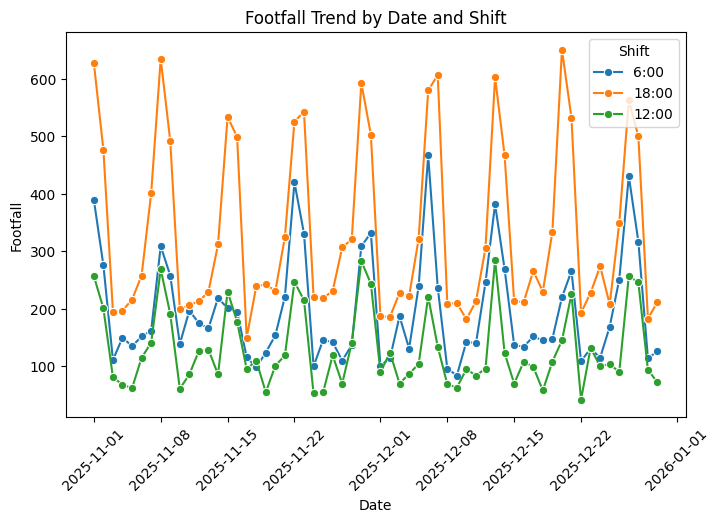

In [10]:
plt.figure(figsize=(8,5))
sns.lineplot(data=dataset, x="Date", y="Footfall", hue="Shift", marker="o")
plt.title("Footfall Trend by Date and Shift")
plt.xticks(rotation=45)
plt.show()

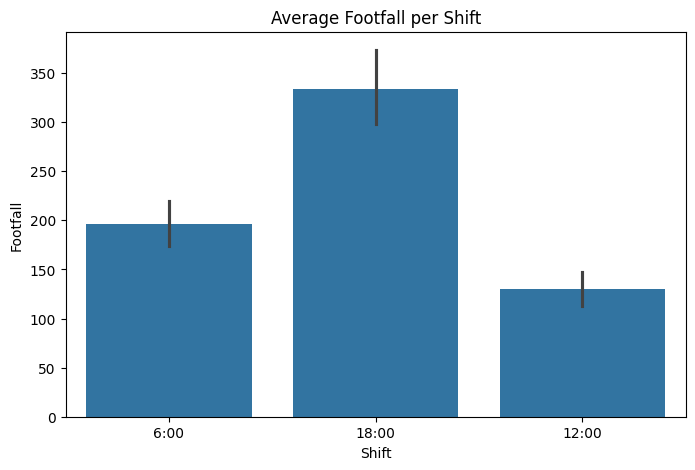

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=dataset, x="Shift", y="Footfall", estimator="mean")
plt.title("Average Footfall per Shift")
plt.show()

In [15]:
pivot = dataset.pivot_table(values="Footfall", index="Date", columns="Shift",aggfunc="mean")

In [16]:
pivot.index = pivot.index.strftime("%d-%b")

In [17]:
pivot = pivot[["6:00", "12:00", "18:00"]]

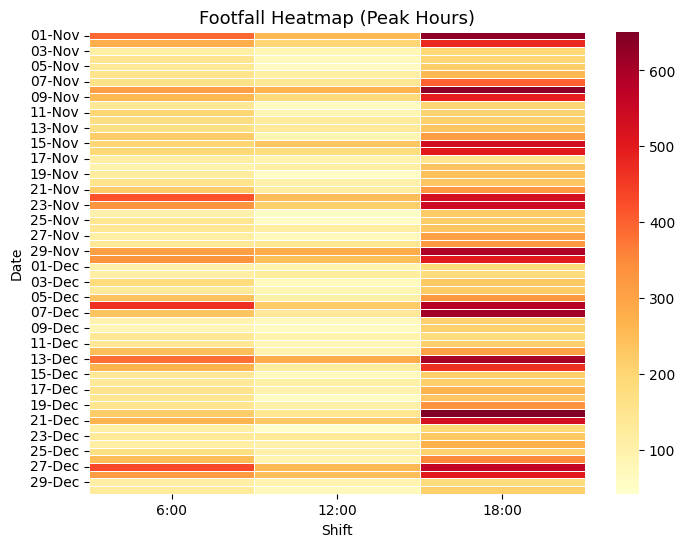

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=False, cmap="YlOrRd",linewidths=0.5, fmt=".0f")
plt.title("Footfall Heatmap (Peak Hours)", fontsize=13)
plt.show()